In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [2]:
V_act=np.array([50,
       50,
       50,
       30,
       10,
       0,])
V_ch=np.array([0,
      10,
      30,
      50,
      50,
      50])
T=np.array([78.2,
   57.4,
   54.2,
   52.9,
   53.4,
   55.7])
p=np.array([759.45,#zmiana w p atmosferycznym <20 mmHg więc nie uwzgledniamy poprawki w temperaturze wrzenia
   759.25,
   759.25,
   759.25,
   759.25,
   759.45])
V_act = V_act/1000 #zamiana na dm3
V_ch = V_ch/1000 
T=T+273.15 #zamiana na K
p=p*133 #zamiana na Pa
#DH_act=
#DH_ch=
W=[V_act,V_ch,T]
T=np.flip(T)

In [3]:
A=[[0.0000,  0.0000,   101.200,  353.84,    4.98142,   1.00000,    0.0000],
  [0.0500, 0.3317,   101.200,  342.42,    4.33478,   1.00508,    0.0781],
  [0.1000, 0.4703,   101.200,  336.58,    3.70202,   1.02032,    0.1490],
  [0.1500, 0.5419,   101.200,  333.30,    3.16839,   1.04541,    0.2107],
  [0.2000, 0.5842,   101.200,  331.32,    2.73727,   1.08015,    0.2631],
  [0.2500, 0.6117,   101.200,  330.06,    2.39243,   1.12467,    0.3062],
  [0.3000, 0.6310,   101.200,  329.23,    2.11611,   1.17946,    0.3404],
  [0.3500,  0.6457,   101.200,  328.65,    1.89334,   1.24533,    0.3660],
  [0.4000,  0.6577,   101.200,  328.22,    1.71257,   1.32348,    0.3834],
  [0.4500,  0.6684,   101.200,  327.88,    1.56491,   1.41547,    0.3926],
  [0.5000,  0.6788,   101.200,  327.61,    1.44368,   1.52333,    0.3940],
  [0.5500,  0.6895,   101.200,  327.38,    1.34385,   1.64961,    0.3878],
  [0.6000,  0.7014,   101.200,  327.19,    1.26159,   1.79750,    0.3740],
  [0.6500,  0.7151,   101.200,  327.03,    1.19398,   1.97098,    0.3527],
  [0.7000,  0.7317,   101.200,  326.91,    1.13881,   2.17501,    0.3241],
  [0.7500,  0.7521,   101.200,  326.86,    1.09440,   2.41580,    0.2882],
  [0.8000,  0.7779,   101.200,  326.91,    1.05946,   2.70108,    0.2449],
  [0.8500,  0.8112,   101.200,  327.10,    1.03308,   3.04049,    0.1945],
  [0.9000,  0.8553,   101.200,  327.50,    1.01461,   3.44601,    0.1368],
  [0.9500,  0.9153,   101.200,  328.21,    1.00365,   3.93255,    0.0719],
  [1.0000,  1.0000,   101.200,  329.40,    1.00000,   4.51787,    0.0000]]
B=[]
for i in range(0,len(A[0])):
  B.append([i])
  for j in range(0,len(A)):
    B[i].append(j)
    B[i][j]=A[j][i]
  B[i].pop(-1)
B

[[0.0,
  0.05,
  0.1,
  0.15,
  0.2,
  0.25,
  0.3,
  0.35,
  0.4,
  0.45,
  0.5,
  0.55,
  0.6,
  0.65,
  0.7,
  0.75,
  0.8,
  0.85,
  0.9,
  0.95,
  1.0],
 [0.0,
  0.3317,
  0.4703,
  0.5419,
  0.5842,
  0.6117,
  0.631,
  0.6457,
  0.6577,
  0.6684,
  0.6788,
  0.6895,
  0.7014,
  0.7151,
  0.7317,
  0.7521,
  0.7779,
  0.8112,
  0.8553,
  0.9153,
  1.0],
 [101.2,
  101.2,
  101.2,
  101.2,
  101.2,
  101.2,
  101.2,
  101.2,
  101.2,
  101.2,
  101.2,
  101.2,
  101.2,
  101.2,
  101.2,
  101.2,
  101.2,
  101.2,
  101.2,
  101.2,
  101.2],
 [353.84,
  342.42,
  336.58,
  333.3,
  331.32,
  330.06,
  329.23,
  328.65,
  328.22,
  327.88,
  327.61,
  327.38,
  327.19,
  327.03,
  326.91,
  326.86,
  326.91,
  327.1,
  327.5,
  328.21,
  329.4],
 [4.98142,
  4.33478,
  3.70202,
  3.16839,
  2.73727,
  2.39243,
  2.11611,
  1.89334,
  1.71257,
  1.56491,
  1.44368,
  1.34385,
  1.26159,
  1.19398,
  1.13881,
  1.0944,
  1.05946,
  1.03308,
  1.01461,
  1.00365,
  1.0],
 [1.0,
  1.005

In [4]:
n_act=4.63*V_act
n_ch=3.24*V_ch
n_ch

array([0.    , 0.0324, 0.0972, 0.162 , 0.162 , 0.162 ])

In [5]:
X_ch=[]
X_act=[]
for i in range(0,6):
  X_ch.append(i)
  X_ch[i]=(n_ch[i])/(n_act[i]+n_ch[i])
  X_act.append(i)
  X_act[i]=1-X_ch[i]
X_ch, X_act

([0.0,
  0.12277377794619175,
  0.2957103742013995,
  0.5383848454636092,
  0.7777244359097456,
  1.0],
 [1.0,
  0.8772262220538083,
  0.7042896257986004,
  0.4616151545363908,
  0.2222755640902544,
  0.0])

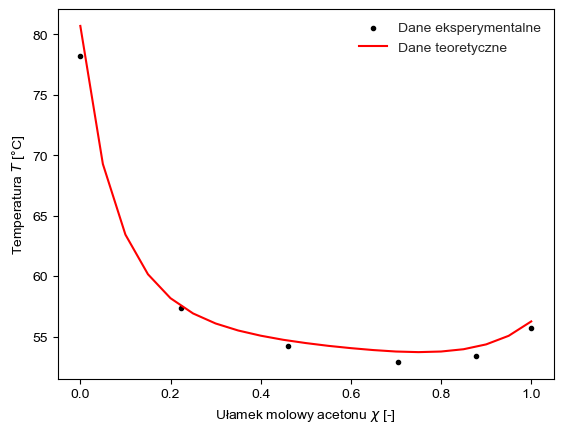

In [6]:
plt.scatter(X_act, T-273.15, marker='.',color='k', label='Dane eksperymentalne')
plt.plot(B[0],np.array(B[3])-273.15,'r',label='Dane teoretyczne')
plt.xlabel("Ułamek molowy acetonu $\chi$ [-]")
plt.ylabel("Temperatura $T$ [°C]")
plt.style.use('seaborn-whitegrid')
plt.legend(loc="best")
plt.show()

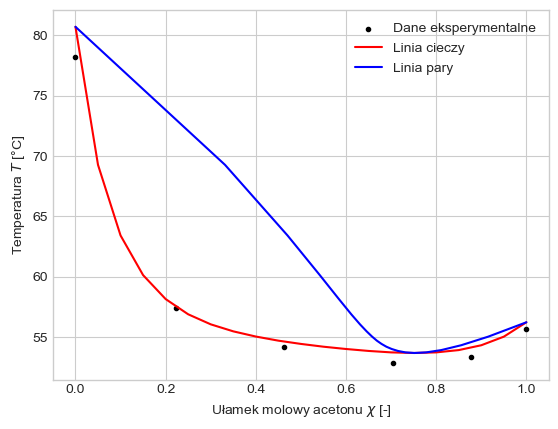

In [9]:
plt.scatter(X_act, T-273.15, marker='.',color='k', label='Dane eksperymentalne')
plt.plot(B[0],np.array(B[3])-273.15,'r',label='Linia cieczy')
plt.plot(B[1],np.array(B[3])-273.15,'b', label='Linia pary')
plt.xlabel("Ułamek molowy acetonu $\chi$ [-]")
plt.ylabel("Temperatura $T$ [°C]")
plt.style.use('seaborn-whitegrid')
plt.legend(loc="best")
plt.show()